<a href="https://colab.research.google.com/github/ptrermaya/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

Dataset disimpan dalam bentuk zip pada Google Drive

In [1]:
#https://drive.google.com/file/d/1dzV9eYIO5Xb9Dnz5bCh4Qyen68oOOjan/view?usp=sharing
!gdown --id 1dzV9eYIO5Xb9Dnz5bCh4Qyen68oOOjan

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dzV9eYIO5Xb9Dnz5bCh4Qyen68oOOjan
To: /content/titanic.zip
100% 34.9k/34.9k [00:00<00:00, 49.4MB/s]


In [2]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Load Dataset

In [3]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from matplotlib import style
%matplotlib inline  

In [4]:
#load dataset
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#memunculkan 5 data teratas
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#memunculkan 5 data terbawah
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#Melihat pembagian data pada kolom label yaitu 'Survived'
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Cleaning & EDA

Performing Data Cleaning and Analysis

1. memahami setiap kolom:
Data Dictionary: 
Deskripsi tiap variabel
 
Survived - Survived (1) atau died (0)

Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)

Name - Passenger’s name

Sex - Passenger’s sex

Age - Passenger’s age

SibSp - Number of siblings/spouses aboard

Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)

Ticket - Ticket number

Cabin - Cabin

Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


2. Menganalisis kolom mana yang kira kira akan useful untuk menentukan apakah seseorang akan survived atau tidak

In [8]:
#Kolom nama tidak akan pernah bisa menentukan apakah seseorang akan survived atau tidak, 
#jadi bisa ;angsung mendeletenya

del titanic["Name"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Begitu juga jenis tiket, Kolom tiket tidak akan pernah bisa menentukan apakah seseorang akan survived atau tidak, 
#jadi bisa langsung mendeletenya

del titanic["Ticket"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [11]:
#Melihat jumlah data null
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Cabin,687,77.104377
Embarked,2,0.224467


In [13]:
#Dengan melihat presentasi jumlah missing value tiap kolom, kita dapat melihat kalau jumlah missing value dalam kolom 'Cabin'
#sangat besar sekali, bahkan sampai 77%, dengan begini kita bisa mengatakan kalau kolom 'Cabin' tidak punya pengaruh banyak
#dalam menentukan apakah seseorang akan survived atau tidak

del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [14]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


Diatas bisa dilihat ada 2 kolom yang mempunyai missing value, yaitu kolom 'Age' dan 'Embarked'. Selanjutnya akan dilakukan proses untuk menghandle kolom 'Age' terlebih dahulu, dimana kolom tersebut akan diisi menggunakan nilai Mean dengan melihat kelas survivednya. Dimana jika ada di data kelas 0 maka akan mengisinya dengan mean 'Age' kelas 0, dan jika data ada di kelas 1 maka akan diisi menggunakan mean 'Age' kelas 1

In [15]:
'''untuk mengisi nilai yang kosong, itu bisa menggunakan mean / rata-rata (kalo data yang dimasukan itu berupa numerik)
dan median / nilai tengah (kalo data yang dimasukan berupa kategorik)'''
# mencari nilai mean kolom 'Age' untuk kelas 1
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

In [16]:
# mengisi missing value pada kolom 'Age' untuk yang kelas 1 dengan menggunakan mean 'Age' kelas 1
titanic["Age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
# mencari nilai mean kolom 'Age' untuk kelas 0

meanNS=titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

In [18]:
# mengisi missing value pada kolom 'Age' untuk yang kelas 0 dengan menggunakan mean 'Age' kelas 0

titanic.Age.fillna(meanNS,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [19]:
# Disini bisa dilihat kalau setelah dilakukan proses diatas, maka tidak ada missing values pada kolom 'Age'

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [20]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


Lalu untuk yang kolom "Embarked" bisa dilihat bahwa hanya 2 data saja yg mempunyai masalah missing value, dengan begitu bisa langsung menghapus data yang mempunya missing value, karena data yg punya masalah missing value tidak banyak, yaitu hanya 2

In [21]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [22]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,30.626179,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [23]:
# Disini kita bisa melihat kalau setelah dilakukan proses diatas, maka tidak ada missing values pada kolom apapun

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


In [25]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.704515,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.977255,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [27]:
# Banyak algoritma machine learning tidak dapat bekerja dengan categorical data, maka dari itu
# akan dilakukan proses untuk merubah value pada kolom 'Sex' dari bentuk categorical menjadi numerical dengan ketentuan male=1 and female=2


def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Sex"]=titanic["Sex"].apply(getNumber)

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,2,38.0,1,0,71.2833,C
2,3,1,3,2,26.0,0,0,7.9250,S
3,4,1,1,2,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [28]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
#Merubah data kategorikal pada kolom "Embarked" ke data numerical

def getEmb(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
titanic["Embarked"]=titanic["Embarked"].apply(getEmb)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,2,38.0,1,0,71.2833,3
2,3,1,3,2,26.0,0,0,7.9250,1
3,4,1,1,2,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [30]:
# Menghapus kolom ID karna tidak berpengaruh terhadap prediksi survived atau tidak
del titanic['PassengerId']
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1
1,1,1,2,38.000000,1,0,71.2833,3
2,1,3,2,26.000000,0,0,7.9250,1
3,1,1,2,35.000000,1,0,53.1000,1
4,0,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,1
887,1,1,2,19.000000,0,0,30.0000,1
888,0,3,2,30.626179,1,2,23.4500,1
889,1,1,1,26.000000,0,0,30.0000,3


#### Visualisasi Data perbandingan Antara Pria dan Wanita yg selamat maupun tidak selamat

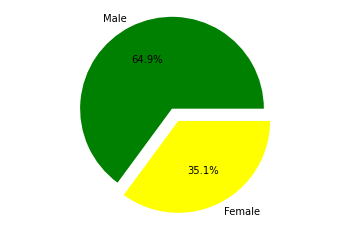

In [31]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (titanic['Sex'] == 1).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
females = (titanic['Sex'] == 2).sum()
# print(males)
# print(females)
p = [males, females]
plt.pie(p,    #giving array
        autopct='%1.1f%%',
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

Penumpang dengan jenis kelamin laki-laki lebih banyak daripada perempuan yaitu dengan perbandingan 64.9% : 35.1% 

In [32]:
# More Precise Pie Chart
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


In [33]:
MaleS=titanic[titanic['Sex']==1][titanic['Survived']==1].shape[0]

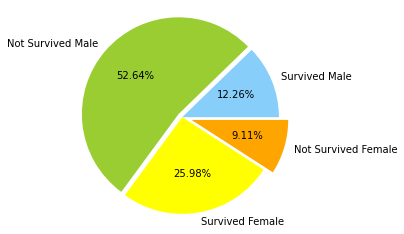

In [34]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode, autopct="%.2f%%")
plt.axis("equal")
plt.show()

- Jumlah penumpang yang tidak selamat paling banyak dengan jenis kelamin laki-laki
- Dan sebaliknya, jumlah penumpang yang selamat paling banyak dengan jenis kelamin perempuan

#### Visualisasi penumpang berdasarkan Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

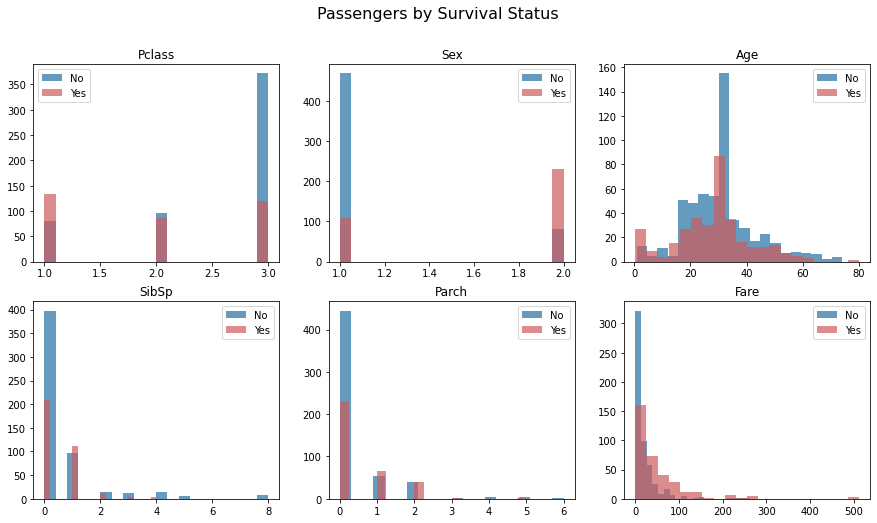

In [35]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
flag = 0

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15,8)) #tight_layout=True
for i in range(2):
    for j in range(3):
        x1 = titanic[titanic['Survived']==0][cols[flag]].values
        x2 = titanic[titanic['Survived']==1][cols[flag]].values
        axs[i,j].hist(x1, bins=20, color='#2471A3', alpha=0.7, label='No')
        axs[i,j].hist(x2, bins=20, color='indianred', alpha=0.7, label='Yes')
        axs[i,j].set_title(str(cols[flag]))
        axs[i,j].legend()
        flag+=1

fig.suptitle('Passengers by Survival Status', fontsize=16)
plt.show()

- Pclass - dapat dilihat bahwa penumpang Kelas Satu yang selamat lebih tinggi daripada kelas dua dan tiga. Sedangkan penumpang yang tidak selamat paling banyak dari kelas tiga
- Age - dapat dilihat bahwa anak-anak lebih banyak yang selamat daripada yang tidak selamat.
- SibSp dan Parch - Jumlah anggota keluarga bisa meningkatkan kemungkinan untuk selamat.
- Fare - Tarif yang lebih tinggi berarti tingkat keselamatan yang tinggi, dimana tarif bisa menjadi faktor menentukan kelas.

# Modeling & Evaluation

In [36]:
# import library yang dibutuhkan
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [37]:
#Define Variable
x = titanic.drop(['Survived'], axis=1).values
y = titanic['Survived'].values

In [38]:
#Split train & test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123) #Train:Test (80:20)

In [39]:
#List model
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier' : AdaBoostClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'SupportVectorMachine' : SVC(),
    'NaiveBayes' : GaussianNB()
}

In [40]:
# Dictonary to hold models and it's metrics
dict_ensemble_methods_f1= {}
dict_ensemble_methods_acc = {}
dict_ensemble_methods_model = {}

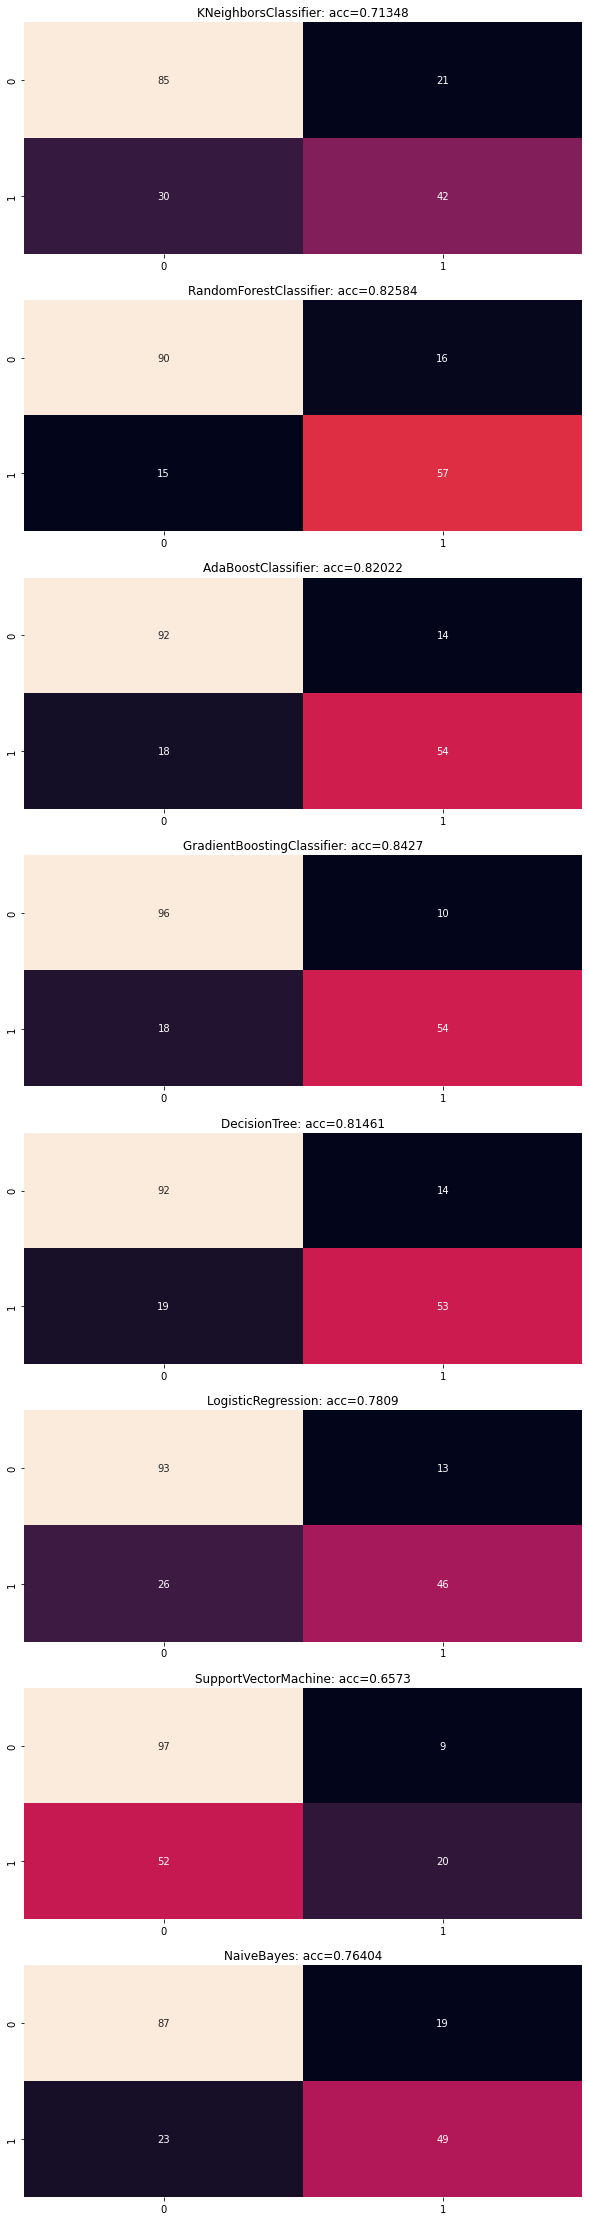

In [41]:
fig, axs = plt.subplots(len(models), 1, figsize=(10, len(models)*5))
for model_name, i in zip(models, range(len(models))):
    # Load the model obj, fit, predict, f1-score, and acc
    model = models[model_name]
    model.fit(
        x_train, 
        y_train
    )
    res=model.predict(x_test)
    f1=f1_score(y_test, res, average='micro')
    acc=accuracy_score(y_test, res)

    # Load the result into the created dict
    dict_ensemble_methods_f1[model_name]=f1
    dict_ensemble_methods_acc[model_name]=acc
    dict_ensemble_methods_model[model_name]=model
    
    cm=confusion_matrix(y_test, res)

    # Plot results
    axs[i].set_title(f'{model_name}: acc={np.round(acc, 5)}')
    sns.heatmap(ax=axs[i], data=cm, annot=True, fmt='g', cbar=False)
plt.show()

In [42]:
#Data frame accuracy dan f1-score
dct = {'Accuracy':dict_ensemble_methods_acc, 'F1-Score':dict_ensemble_methods_f1}
model_df = pd.DataFrame(dct).sort_values(ascending = False , by = 'Accuracy')
model_df 

,Accuracy,F1-Score
GradientBoostingClassifier,0.842697,0.842697
RandomForestClassifier,0.825843,0.825843
AdaBoostClassifier,0.820225,0.820225
DecisionTree,0.814607,0.814607
LogisticRegression,0.780899,0.780899
NaiveBayes,0.764045,0.764045
KNeighborsClassifier,0.713483,0.713483
SupportVectorMachine,0.657303,0.657303


Akurasi dan F1-Score tertinggi adalah Gradient Boosting

In [43]:
best_model=dict((v, k) for k, v in dict_ensemble_methods_acc.items()).get(max(dict_ensemble_methods_acc.values()))
y_prediksi=dict_ensemble_methods_model[best_model].predict(x_test)

In [44]:
print(classification_report(y_test, y_prediksi))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       106
           1       0.84      0.75      0.79        72

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



### Feature Importance

In [45]:
best_model=dict((v, k) for k, v in dict_ensemble_methods_acc.items()).get(max(dict_ensemble_methods_acc.values()))
imp=dict_ensemble_methods_model[best_model].feature_importances_
imp

array([0.14614612, 0.42406533, 0.25515905, 0.04516903, 0.00087415,
       0.11052514, 0.01806118])

In [46]:
feature = titanic.drop(['Survived'], axis=1)
feature_names = feature.columns
feature_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

<BarContainer object of 7 artists>

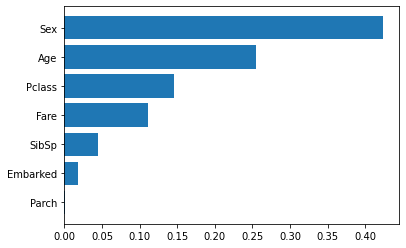

In [47]:
sorted_idx = imp.argsort()
plt.barh(feature_names[sorted_idx], imp[sorted_idx])

Faktor yang paling menentukan seseorang survived atau tidak adalah jenis kelamin penumpang (Sex). Hal tersebut bisa disebabkan karna prioritas yang akan diselamatkan terlebih dahulu adalah perempuan.

# Predict

Dilakukan prediksi dengan data test

In [48]:
#load data
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
#save fitur id
id=test['PassengerId']

In [50]:
#cleaning data test
test_df=test
test_df.drop(columns=['Name', 'Ticket','Cabin','PassengerId'], inplace=True)
test_df['Sex'].replace({'male': 1, 'female': 2}, inplace=True)
test_df['Embarked'].replace({'S': 1, 'Q': 2, 'C' : 3}, inplace=True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,2,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,1
4,3,2,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,1
414,1,2,39.0,0,0,108.9000,3
415,3,1,38.5,0,0,7.2500,1
416,3,1,NaN,0,0,8.0500,1


Mengatasi missing value pada data test dengan nilai mean

In [51]:
meanS= test_df.Age.mean()
test_df.Age.fillna(meanNS,inplace=True)

In [52]:
meanS= test_df.Fare.mean()
test_df.Fare.fillna(meanNS,inplace=True)
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [53]:
#prediksi
res=dict_ensemble_methods_model[best_model].predict(test_df)
res

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
#membuat data frame untuk final result
res_df=pd.DataFrame()
res_df['PassengerId']=id
res_df['Survived']=list(res)
res_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Test Submission

Membandingkan hasil prediksi model dengan file submission yang tersedia

In [55]:
res_df.to_csv('result.csv')

In [56]:
sub = pd.read_csv('gender_submission.csv')

In [57]:
print('Akurasi hasil prediksi dan submission: {0:0.2f}'. format (accuracy_score(res_df['Survived'],sub['Survived'])))

Akurasi hasil prediksi dan submission: 0.85
